# Import libary

In [21]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Connect to database 

In [3]:
# Read password from file
f= open('./password.txt','r')
pw = f.read()
f.close()

#ODBC (Includes Node.js) (SQL authentication)
s = "Driver={ODBC Driver 18 for SQL Server};Server=tcp:serverz.database.windows.net,1433;Database=DB_LAB03;Uid=tendangnhap;"+f"Pwd={pw};"+"Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"


In [4]:
## Connect to the database
conn = pyodbc.connect(s)
cursor = conn.cursor()

# Correlation
**Correlation** (tương quan) là một khái niệm trong thống kê để đo lường mức độ liên quan giữa hai biến số. Nó cho biết liệu hai biến có xu hướng thay đổi cùng chiều hay không.
Trong Python, thư viện `pandas` cung cấp phương thức `corr()` để tính toán hệ số tương quan giữa hai cột hoặc hai Series trong DataFrame.

**Hệ số tương quan** là một số trong khoảng từ -1 đến 1:

+ Nếu hệ số tương quan là 1, điều đó có nghĩa là hai biến tăng hoặc giảm hoàn toàn đồng bộ (tương quan tuyến tính dương hoàn hảo).
+ Nếu hệ số tương quan là -1, điều đó có nghĩa là khi một biến tăng thì biến kia giảm và ngược lại (tương quan tuyến tính âm hoàn hảo).
+ Nếu hệ số tương quan là 0, điều đó có nghĩa là hai biến không có mối liên hệ tuyến tính với nhau.


## Between Safety_score, Average_Student_Attendance, Environment_Score

In [10]:
tbl_Student_Performance = pd.read_sql("SELECT * FROM tbl_Student_Performance", conn)
tbl_School_Survey = pd.read_sql("SELECT * FROM tbl_School_Survey", conn)

<ipython-input-10-9811a83e82e1>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tbl_Student_Performance = pd.read_sql("SELECT * FROM tbl_Student_Performance", conn)
<ipython-input-10-9811a83e82e1>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tbl_School_Survey = pd.read_sql("SELECT * FROM tbl_School_Survey", conn)


In [13]:
joined = pd.merge(tbl_Student_Performance, tbl_School_Survey, on='School_ID')
print(joined.columns)

Index(['School_ID', 'Average_Student_Attendance',
       'Rate_of_Misconducts_per_100_students', 'Safety_Icon', 'Safety_Score',
       'Environment_Icon', 'Environment_Score',
       'CPS_Performance_Policy_Status', 'CPS_Performance_Policy_Level',
       'Healthy_Schools_Certified', 'Adequate_Yearly_Progress_Made',
       'Individualized_Education_Program_Compliance_Rate'],
      dtype='object')


                            Safety_Score  Average_Student_Attendance  \
Safety_Score                    1.000000                    0.339597   
Average_Student_Attendance      0.339597                    1.000000   
Environment_Score               0.585865                    0.245320   

                            Environment_Score  
Safety_Score                         0.585865  
Average_Student_Attendance           0.245320  
Environment_Score                    1.000000  


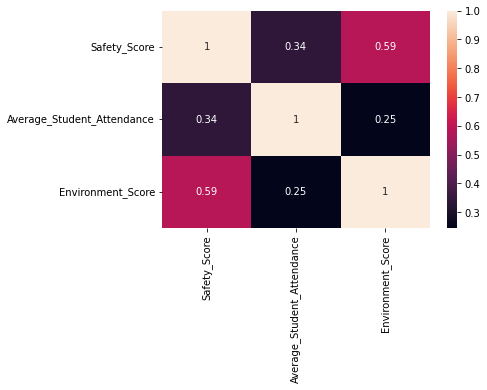

In [22]:
features = ['Safety_Score', 'Average_Student_Attendance', 'Environment_Score']

joined = joined[features]
#Convert to float 
joined['Safety_Score'] = joined['Safety_Score'].astype(float)
joined['Average_Student_Attendance'] = joined['Average_Student_Attendance'].astype(float)
joined['Environment_Score'] = joined['Environment_Score'].astype(float)


# Calculate correlation
correlation = joined.corr()
print(correlation)

# Create heatmap
sns.heatmap(correlation, annot=True)
plt.show()
